In [40]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
import imageio
from mpl_toolkits.mplot3d import Axes3D
import random
from scipy.spatial import ConvexHull

In [56]:
def print_a_circle(file_lines, start_row, end_row, r, lifetime): 
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    for i in range (start_row, end_row):
        x_centre = file_lines[i][0]        
        y_centre = file_lines[i][1]        
        z_centre = file_lines[i][2]
        age = file_lines[i][3]
        if (x_centre == 0 and y_centre == 0 and z_centre ==0):
            continue
        current_rad = r*(1+age/lifetime)
        x = current_rad * np.outer(np.cos(u), np.sin(v)) + x_centre
        y = current_rad * np.outer(np.sin(u), np.sin(v)) + y_centre
        z = current_rad * np.outer(np.ones(np.size(u)), np.cos(v)) + z_centre
        if file_lines[i][3] == file_lines[i+(end_row-start_row)][3]:

            ax.plot_surface(x, y, z,  rstride=1, cstride=1, color="b", linewidth=0.2, alpha=1)
        else:
            ax.plot_surface(x, y, z,  rstride=1, cstride=1, color="r", linewidth=0.4, alpha=1)


In [49]:
def cell_count(file_lines, start_row, end_row, number_of_cells):
    for i in range (start_row, end_row):
        if (file_lines[i][0] == 0 and file_lines[i][1] == 0 and file_lines[i][2] ==0):
            number_of_cells -=1
    return number_of_cells        

In [50]:
def find_the_max_and_min_coordinates(file_lines):
    x_max = (np.array(file_lines).max(axis=0))[0]
    y_max = (np.array(file_lines).max(axis=0))[1]
    z_max = (np.array(file_lines).max(axis=0))[2]
    x_min = (np.array(file_lines).min(axis=0))[0]
    y_min = (np.array(file_lines).min(axis=0))[1]
    z_min = (np.array(file_lines).min(axis=0))[2]
    return x_max, y_max, z_max, x_min, y_min, z_min

In [51]:
file_lines = []
with open ("3doutput.txt") as my_file:
    for line in my_file:
        line = line.strip()
        temp = line.split(",")
        file_lines.append([float(temp[0]), float(temp[1]), float(temp[2]), float(temp[3])])      
x_max, y_max, z_max, x_min, y_min, z_min = find_the_max_and_min_coordinates(file_lines)

In [52]:
number_of_cells = 70

In [53]:
max_line = (len(file_lines))
start_line = 0
time = 0
#while start_line < 10:
while start_line < (max_line - (number_of_cells+1)):
    fig = plt.figure()
    cells_counted = cell_count(file_lines, start_line, start_line + number_of_cells, number_of_cells)
    fig.suptitle('Time = {}, Number of Cells = {}'.format(time, cells_counted), fontsize=12)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax = plt.gca()
    ax.set_xlim3d((x_min, x_max))
    ax.set_ylim3d((y_min, y_max))
    ax.set_zlim3d((z_min, z_max))

    print_a_circle(file_lines, start_line, start_line+(number_of_cells), 0.25, 8)
    plt.savefig("m=1, Startline = {}".format(start_line))
    plt.close()

    
    start_line += (number_of_cells)
    time += 0.5


In [95]:
filenames= ["m=100, Startline = {}.png".format((number_of_cells)*x) for x in range(72)]

images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('m=100.gif', images, fps=5)

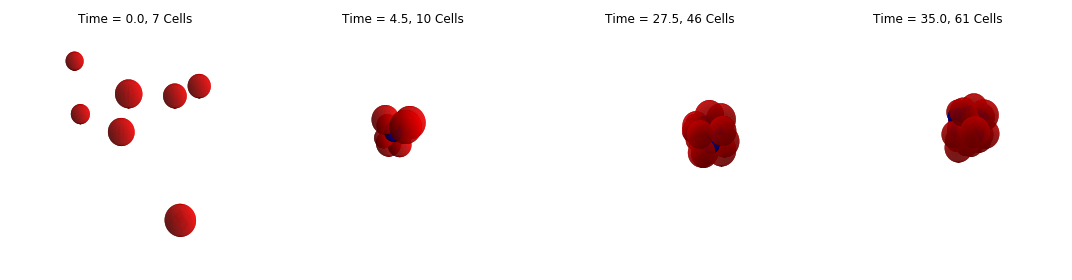

In [59]:
import matplotlib.ticker as ticker
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=(15,4))
plt.axis('off')
#fig.suptitle('Time = 37.5, Number of Cells = 65', fontsize=12)
#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.view_init(elev=10., azim=120)
ax.set_title("Time = 0.0, 7 Cells")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.set_xlim3d((x_min, x_max))
ax.set_ylim3d((y_min, y_max))
ax.set_zlim3d((z_min, z_max))
ax.set_axis_off()
print_a_circle(file_lines, 0, 70, 0.25, 8)

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.view_init(elev=10., azim=120)
ax.set_title("Time = 4.5, 10 Cells")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")



ax.set_xlim3d((x_min, x_max))
ax.set_ylim3d((y_min, y_max))
ax.set_zlim3d((z_min, z_max))
ax.set_axis_off()
print_a_circle(file_lines, 630, 700, 0.25, 8)


#===============
# Third subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.view_init(elev=10., azim=30)
ax.set_title("Time = 27.5, 46 Cells")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim3d((x_min, x_max))
ax.set_ylim3d((y_min, y_max))
ax.set_zlim3d((z_min, z_max))

ax.set_axis_off()
print_a_circle(file_lines, 3850, 3850+70, 0.25, 8)


# #===============
# # Third subplot
# #===============
# # set up the axes for the second plot
ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.view_init(elev=10., azim=50)
ax.set_title("Time = 35.0, 61 Cells")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim3d((x_min, x_max))
ax.set_ylim3d((y_min, y_max))
ax.set_zlim3d((z_min, z_max))

ax.set_axis_off()
print_a_circle(file_lines, 4900, 4900+70, 0.25, 8)

plt.tight_layout()
plt.savefig("opaque_nobg_nozoom.png")
plt.show()

In [41]:
filenames= ["azim = {}.png".format(10*x) for x in range(36)]

images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('final_cluster.gif', images, fps=5)

In [61]:
def find_neighbours(points):
    neighbours = []
    for i in range (len(points)):
        neighbours.append([])

    for i in range (len(hull.simplices)):
            neighbours[hull.simplices[i][0]].append(hull.simplices[i][1])
            neighbours[hull.simplices[i][0]].append(hull.simplices[i][2])

            neighbours[hull.simplices[i][1]].append(hull.simplices[i][0])
            neighbours[hull.simplices[i][1]].append(hull.simplices[i][2])

            neighbours[hull.simplices[i][2]].append(hull.simplices[i][0])
            neighbours[hull.simplices[i][2]].append(hull.simplices[i][1])

    for i in range (len(neighbours)):
        neighbours[i] = list(set(neighbours[i]))
    return neighbours

In [98]:
points = []
for i in range (max_line - 100, max_line - (number_of_cells)):
    if file_lines[i][0] == 0 and file_lines[i][1] == 0 and file_lines[i][2]==0:
        continue
    else:
        points.append(file_lines[i][0])
        points.append(file_lines[i][1])
        points.append(file_lines[i][2])
points = np.array(points)
points = points.reshape(47,3)

In [99]:
hull = ConvexHull(points)
neighbours = find_neighbours(points)

In [100]:
unit_vecs = []
for i in range (len(points)):
    unit_vecs.append(0)
    
for i in hull.vertices:
    unit_vector = 0
        
    for j in neighbours[i]:
        vector2 = points[j] - points[i]
        mag_2 = np.sqrt(vector2.dot(vector2))
        unit_vector2 = vector2/mag_2
        unit_vector += unit_vector2

    if np.sqrt(unit_vector.dot(unit_vector)) != 0:
        unit_vector = unit_vector / (np.sqrt(unit_vector.dot(unit_vector)))
        unit_vector = unit_vector.tolist()

    unit_vecs[i] = unit_vector

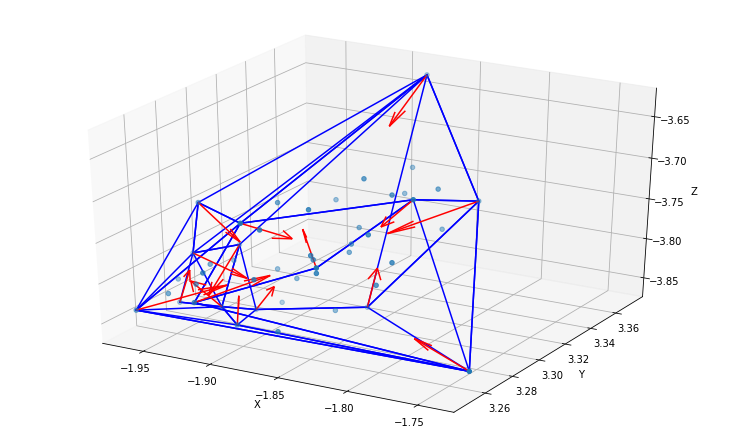

In [104]:
fig = plt.figure(figsize = (10,6))

ax = Axes3D(fig)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")


ax.scatter(points[:,0], points[:,1], points[:,2], 'r')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], points[simplex,2], 'b-')


lines_to_draw = unit_vecs
us = []
vs = []
ws = []

for i in hull.vertices:
    us.append(unit_vecs[i][0] /20)
    vs.append(unit_vecs[i][1] / 20)
    ws.append(unit_vecs[i][2] / 20)

xs, ys, zs    = points[hull.vertices,0], points[hull.vertices, 1], points[hull.vertices,2]

ax.quiver(xs, ys, zs, us, vs, ws, color = "r")
plt.savefig("m=100 quiver plot further reduced arrow.png")

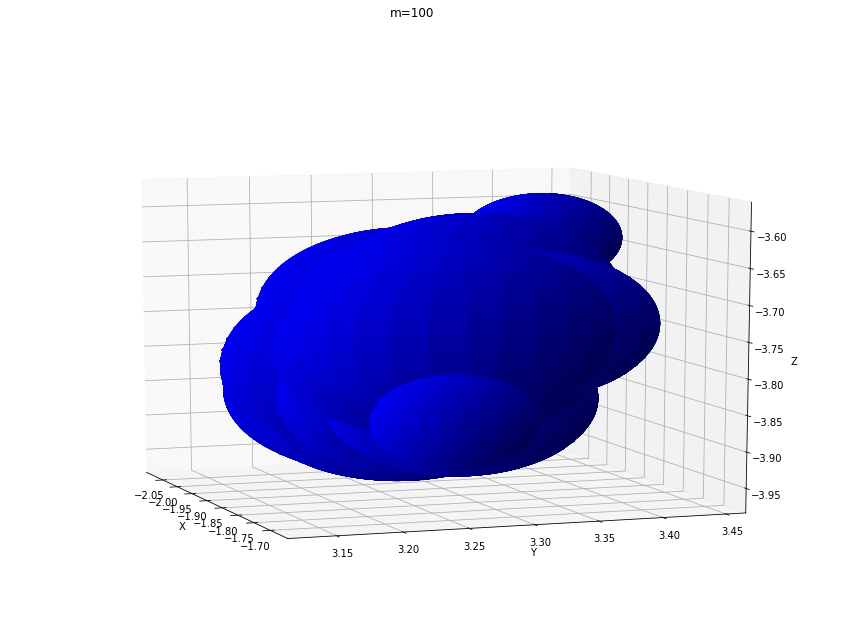

In [107]:
max_line = (len(file_lines))
start_line = 0
#while start_line < 10:
fig = plt.figure(figsize = (15,10))
fig.suptitle('m=100', fontsize=12)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

for ii in range(0,360,20):
    ax.view_init(elev=10., azim=ii)
    print_a_circle(file_lines, max_line-100, max_line-(number_of_cells), 0.25, 8)
    ax.quiver(xs, ys, zs, us, vs, ws, color = "r")
    plt.savefig("m=100, azim = {}".format(ii))
    

In [108]:
filenames= ["m=100, azim = {}.png".format(20*x) for x in range(18)]

images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('m=100, final_cluster.gif', images, fps=5)

In [11]:
from PIL import Image
from functools import reduce
import numpy as np
import time

class vec3():
    def __init__(self, x, y, z):
        (self.x, self.y, self.z) = (x, y, z)
    def __mul__(self, other):
        return vec3(self.x * other, self.y * other, self.z * other)
    def __add__(self, other):
        return vec3(self.x + other.x, self.y + other.y, self.z + other.z)
    def __sub__(self, other):
        return vec3(self.x - other.x, self.y - other.y, self.z - other.z)
    def dot(self, other):
        return (self.x * other.x) + (self.y * other.y) + (self.z * other.z)
    def __abs__(self):
        return self.dot(self)
    def norm(self):
        mag = np.sqrt(abs(self))
        return self * (1.0 / np.where(mag == 0, 1, mag))
    def components(self):
        return (self.x, self.y, self.z)
rgb = vec3

(w, h) = (500, 500)         # Screen size
L = vec3(5, 5., -10)        # Point light position
E = vec3(0., 0.35, -1.)     # Eye position
FARAWAY = 1.0e39            # an implausibly huge distance

def raytrace(O, D, scene, bounce = 0):
    # O is the ray origin, D is the normalized ray direction
    # scene is a list of Sphere objects (see below)
    # bounce is the number of the bounce, starting at zero for camera rays

    distances = [s.intersect(O, D) for s in scene]
    nearest = reduce(np.minimum, distances)
    color = rgb(0, 0, 0)
    for (s, d) in zip(scene, distances):
        color += s.light(O, D, d, scene, bounce) * (nearest != FARAWAY) * (d == nearest)
    return color

class Sphere:
    def __init__(self, center, r, diffuse, mirror = 0.5):
        self.c = center
        self.r = r
        self.diffuse = diffuse
        self.mirror = mirror

    def intersect(self, O, D):
        b = 2 * D.dot(O - self.c)
        c = abs(self.c) + abs(O) - 2 * self.c.dot(O) - (self.r * self.r)
        disc = (b ** 2) - (4 * c)
        sq = np.sqrt(np.maximum(0, disc))
        h0 = (-b - sq) / 2
        h1 = (-b + sq) / 2
        h = np.where((h0 > 0) & (h0 < h1), h0, h1)

        pred = (disc > 0) & (h > 0)
        return np.where(pred, h, FARAWAY)

    def diffusecolor(self, M):
        return self.diffuse

    def light(self, O, D, d, scene, bounce):
        M = (O + D * d)                         # intersection point
        N = (M - self.c) * (1. / self.r)        # normal
        toL = (L - M).norm()                    # direction to light
        toO = (E - M).norm()                    # direction to ray origin
        nudged = M + N * .0001                  # M nudged to avoid itself

        # Shadow: find if the point is shadowed or not.
        light_distances = [s.intersect(nudged, toL) for s in scene]
        light_nearest = reduce(np.minimum, light_distances)
        seelight = light_distances[scene.index(self)] == light_nearest

        # Ambient
        color = rgb(0.05, 0.05, 0.05)

        # Lambert shading (diffuse)
        lv = np.maximum(N.dot(toL), 0)
        color += self.diffusecolor(M) * lv * seelight

        # Reflection
        if bounce < 2:
            rayD = (D - N * 2 * D.dot(N)).norm()
            color += raytrace(nudged, rayD, scene, bounce + 1) * self.mirror

        # Blinn-Phong shading (specular)
        phong = N.dot((toL + toO).norm())
        color += rgb(1, 1, 1) * np.power(np.clip(phong, 0, 1), 50) * seelight
        return color

class CheckeredSphere(Sphere):
    def diffusecolor(self, M):
        checker = ((M.x * 2).astype(int) % 2) == ((M.z * 2).astype(int) % 2)
        return self.diffuse * checker

# scene = [
# #     Sphere(vec3(.75, .1, 1.), .6, rgb(0, 0, 1)),
# #     Sphere(vec3(-.75, .1, 2.25), .6, rgb(.5, .223, .5)),
# #     Sphere(vec3(-2.75, .1, 3.5), .6, rgb(1., .572, .184)),
# #     CheckeredSphere(vec3(0,-99999.5, 0), 99999, rgb(.75, .75, .75), 0.25),
#     ]
for i in range (0, 70):
    x_centre = file_lines[i][0]        
    y_centre = file_lines[i][1]        
    z_centre = file_lines[i][2]
    age = file_lines[i][3]
    if (x_centre == 0 and y_centre == 0 and z_centre ==0):
        continue
    current_rad = r*(1+age/8)
    if file_lines[i][3] == file_lines[i+(70)][3]:
        scene.append(Sphere(vec3(x_centre, y_centre, z_centre), current_rad, rgb(0, 0, 1)))
    else:
        scene.append(Sphere(vec3(x_centre, y_centre, z_centre), current_rad, rgb(1, 0, 0)))


r = float(w) / h
# Screen coordinates: x0, y0, x1, y1.
S = (-1., 1. / r + .25, 1., -1. / r + .25)
x = np.tile(np.linspace(S[0], S[2], w), h)
y = np.repeat(np.linspace(S[1], S[3], h), w)

t0 = time.time()
Q = vec3(x, y, 0)
color = raytrace(E, (Q - E).norm(), scene)
print("Took", time.time() - t0)

rgb = [Image.fromarray((255 * np.clip(c, 0, 1).reshape((h, w))).astype(np.uint8), "L") for c in color.components()]
Image.merge("RGB", rgb).save("rt2.png")

KeyboardInterrupt: 

In [ ]:
    for i in range (start_row, end_row):
        x_centre = file_lines[i][0]        
        y_centre = file_lines[i][1]        
        z_centre = file_lines[i][2]
        age = file_lines[i][3]
        if (x_centre == 0 and y_centre == 0 and z_centre ==0):
            continue
        current_rad = r*(1+age/lifetime)
        x = current_rad * np.outer(np.cos(u), np.sin(v)) + x_centre
        y = current_rad * np.outer(np.sin(u), np.sin(v)) + y_centre
        z = current_rad * np.outer(np.ones(np.size(u)), np.cos(v)) + z_centre
        if file_lines[i][3] == file_lines[i+(end_row-start_row)][3]:

            ax.plot_surface(x, y, z,  rstride=4, cstride=4, color="b", linewidth=0.2, alpha=1)
        else:
            ax.plot_surface(x, y, z,  rstride=4, cstride=4, color="r", linewidth=0.2, alpha=0.6)